# Tracking synapses


In [1]:
import time

from caveclient import CAVEclient
from paleo import (
    get_initial_graph,
    get_root_level2_edits,
    get_nucleus_supervoxel,
    get_node_aliases,
)

In [2]:
root_id = 864691135639556411
client = CAVEclient("minnie65_public", version=1078)

## Collect edit history information


In [3]:
edits = get_root_level2_edits(root_id, client)
initial_graph = get_initial_graph(root_id, client)
nuc_supervoxel_id = get_nucleus_supervoxel(root_id, client)
anchor_nodes = get_node_aliases(nuc_supervoxel_id, client, stop_layer=2)

Extracting level2 edits:   0%|          | 0/693 [00:00<?, ?it/s]

Getting initial graph:   0%|          | 0/309 [00:00<?, ?it/s]

## Apply edit history


In [4]:
from paleo import apply_edit_sequence

nodes_by_state = apply_edit_sequence(
    initial_graph,
    edits,
    anchor_nodes,
    return_graphs=False,
    include_initial=True,
    verbose=True,
)
nodes_by_state[9028]

  0%|          | 0/694 [00:00<?, ?it/s]

{161373192110212021,
 161373192177319957,
 161373260829688894,
 161373260896796674,
 161373329549165526,
 161373329616273411,
 161373398335750279,
 161443492202020923,
 161443560854389734,
 161443560921497602,
 161443629573866365,
 161443629640974337,
 161443698293343195,
 161443698360451073,
 161443767079927917,
 161513860946198532,
 161513929598567394,
 161513929665675266,
 161513929665675274,
 161513998318044173,
 161513998385152001,
 161514067037520900,
 161514067104628737,
 161514135824105588,
 161514135824105609,
 161584229690376221,
 161584298342745132,
 161584298409852931,
 161584367062221750,
 161584367129329665,
 161584435781698483,
 161584435848806401,
 161584435848806430,
 161654598434553982,
 161654667154030620,
 161654735806399337,
 161654735873507331,
 161654804592984109}

## Get synapses, map to state history


In [5]:
from paleo import get_mutable_synapses

currtime = time.time()

pre_synapses = get_mutable_synapses(root_id, edits, client, verbose=True, sides="pre")

print(f"{time.time() - currtime:.3f} seconds elapsed.")

Getting original roots took 1.35 seconds
Getting latest roots took 6.83 seconds
Querying synapse table for pre-synapses...
Querying synapse table took 33.59 seconds


Getting leaves:   0%|          | 0/3046 [00:00<?, ?it/s]

Getting remaining level2s:   0%|          | 0/6 [00:00<?, ?it/s]

130.925 seconds elapsed.


In [6]:
from paleo import map_synapses_to_sequence

pre_synapses_by_state = map_synapses_to_sequence(
    pre_synapses, nodes_by_state, side="pre"
)

  0%|          | 0/694 [00:00<?, ?it/s]

In [7]:
pre_synapses_by_state[9028]

[]

In [8]:
pre_synapses_by_state[87490]

[161850858,
 189432137,
 185549118,
 189955131,
 185551198,
 189955192,
 173214806,
 175121335,
 175121197,
 189954862,
 189954842,
 161470811,
 189432488,
 189432294,
 189432341,
 156938288,
 161469398,
 189432102,
 175120892,
 178846653]

## Plot number of synapses over time


In [9]:
n_synapses = [len(s) for s in pre_synapses_by_state.values()]

Text(0, 0.5, 'Number of pre-synapses')

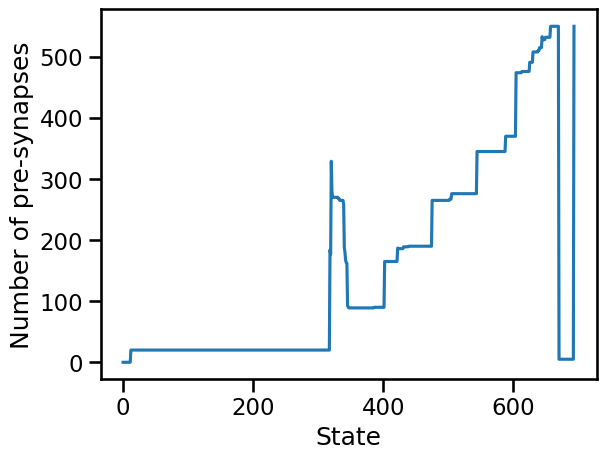

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context("talk")

fig, ax = plt.subplots()
sns.lineplot(x=range(len(n_synapses)), y=n_synapses, ax=ax)
ax.set_xlabel("State")
ax.set_ylabel("Number of pre-synapses")